# Linear Regression with sklearn - Boston Housing Data

## Introduction

In this notebook, let's use a linear model to predict the median price of a house in various place in boston. 

In [132]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import warnings
warnings.simplefilter("always")
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.linear_model import ElasticNet
sns.set()
%matplotlib inline

## Exploratory Data Analysis

In [33]:
# read file into DatFrame and inspect.
df = pd.read_csv('data/boston.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head(10) # first ten rows

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [34]:
# get the shape of the dataframe
print(df.shape)

(506, 14)


The dataframe has 506 rows and 14 columns.
The target varaible we like to predict is the MEDV, or median value of each house given that we have the preceeding columns such as crime rate "CRIM", the zone "ZN" or Nitrous oxide concentration in parts per milliom "NX".

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB
None


Let's explore the co-relations between all features of our datas. We can do this by calling the df.corr() function.

In [73]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Too many numbers to wrap one's head aroud. A heatmap would do the trick. Seaborn is godsend for this, super easy and really informative for us to see how the varaibles are correlated. 

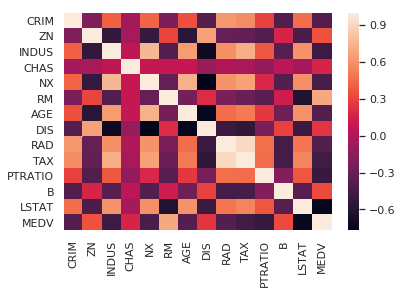

In [85]:
sns.heatmap(df.corr(), xticklabels = df.columns, yticklabels=df.columns);

We can glean a few relationships from the above figure, that the index of accessibility to Radial highways is strongly correlated with the property tax for that area. Which makes sense, the greater the accessability of a certain household to highways, the greater the tax for that area. 

Looking at the numerical matrix we can confirm this with the following peice of code

In [88]:
df.corr().loc['RAD','TAX']

0.9102281885331822

As expected, a perason correlation coefficient of 0.91 is really high. Looking at the MEDV row, we find that it has a strong relationship with the RM or rooms feature. This is invaluable insight, since RM might be a great predictor for the median price of a house. To see what features are really valuable for predicting a certain target, a linear model with a lasso or l-1 penalty is the right choice.

We can use a linear regression model with lasso to confirm such insights.

## Lasso regression 

Lasso regression is a regularized form of regression in which the loss fucntion is tuned with the L-1 norm of the vector of our model.

$$Y_i^{hat} = WX +b$$

Where W is the co-efficient or parameter vector and X is the feature, and b is the bias.

The above expression is a vectorized representation of $$a_1x_1 + a_2x_2 +a3x_3 + ......a_nx_n + b$$ for an n dimensional feature space.

Where W is the vector of co-efficinets or model parameters $$a_1 .....a_n$$ and X is the feature vector $$x_1 .... x_n$$

The loss function is then represented as 

$$MSE =1/n * \sum_i^n(Y_i-Y_i^{hat})^2 $$ 

where $$Y_i^{hat}$$  is the predicted value from our model. Add the L1- norm of the parameter vector to this. 

$$||W||$$

MSE + alpha * L1-norm is lasso regression where alpha is the regularization parameter. A hyperparamter infact. 



In [93]:
# Create target and feature arrays for training
y = df.loc[:, 'MEDV'].values
X = df.drop('MEDV', axis=1)

# instantiate lasso and set alpha to 0.1
lasso = Lasso(alpha=0.1)
lasso

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
# fit it to the data and extract coef 
lasso_coef = lasso.fit(X, y).coef_
lasso_coef
lasso_coef.shape

(13,)

We can plot these with our features to know which feature is really important.

In [101]:
features = X.columns
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

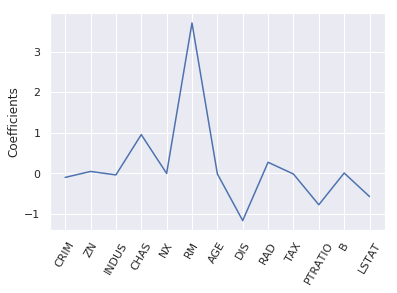

In [103]:
plt.plot(range(len(features)), lasso_coef);
plt.xticks(range(len(features)), features, rotation=60)
plt.ylabel('Coefficients');

Oh Yes! RM feature is indeed a very high predictor of house prices. In reality though l-1 norm is used in situations where the semantic content of the features is really understood. Like in this scenario, but in most cases, using the euclidean norm to regularize your loss fucntion or L2 or ridge regularization is the way to go forward. 

In [151]:
# Let's check for any NaN values
X.info()
X.RAD = X.RAD.astype('float64')
X.CHAS = X.CHAS.astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    5

In [148]:
# Scale the data 
steps = [('scaler', StandardScaler()), ('elasticnet', ElasticNet(max_iter=100))]

# instantiate pipeline
pipeline = Pipeline(steps)

# create param_grid
param_grid = {'elasticnet__l1_ratio': np.linspace(0.1, 1, 30)}

# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# gridsearch_cv with pipeline over the parameter grid
elastic_cv = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# git elastic_cv
elastic_cv.fit(X_train, y_train);

# compute co-efficient of determination
r2 = elastic_cv.score(X_test, y_test)

In [150]:
print(f'the R-square or Co-efficient of deterimnation is {r2}')
print(f'optimzed alpha is {elastic_cv.best_params_}')

the R-square or Co-efficient of deterimnation is 0.6508899592150463
optimzed alpha is {'elasticnet__l1_ratio': 1.0}
